In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from obspy import read

# system libraries
import os


## PyRocko manual picking command
`cd` into the mseed folder and activate pyrocko conda env

In [ ]:
import pyperclip
marker_file = f'../results/phasenet_diting_others/00_master_marker_ASSOCIATED_v2.txt'
cmd = f"snuffler nc71888456.mseed --stationxml=00_station_inventory_master.xml --markers={marker_file}" #--event=00_master_event_file_PyRocko.txt
pyperclip.copy(cmd)
print(f"Command is copied to clipboard: {cmd}")

Command is copied to clipboard: snuffler nc71888456.mseed --stationxml=00_station_inventory_master.xml --markers=../results/phasenet_diting_others/00_master_marker_ASSOCIATED_v2.txt


# move old 47 events to a new folder with only Z component


In [2]:
mseed_list47 = pd.read_csv('../results/phasenet_diting_others/mseed_list_47.csv')
# convert to list
mseed_list47 = mseed_list47.values.tolist()

waveform_dir = '../data/eq_data/2_waveforms'
os.makedirs(f"{waveform_dir}/old_47", exist_ok=True)

for i in range(len(mseed_list47)):
    mseed_file = mseed_list47[i][0]
    # st = read(f"{waveform_dir}/{mseed_file}")
    # st_new = st.select(component='Z')
    # st_new.write(f"{waveform_dir}/old_47/{mseed_file}", format='MSEED')
    # print(mseed_file, len(st_new), len(st))
    # copy the mseed file to the new directory
    os.system(f"cp {waveform_dir}/{mseed_file} {waveform_dir}/old_47/{mseed_file}")


In [17]:
st = read(f"{waveform_dir}/old_47/nc71100926.mseed")
print(len(st))

124


In [3]:
import pyperclip
stationxml = '/Users/mdaislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/data/eq_data/3_station_catalogs/00_station_inventory_master.xml'
marker_file = '/Users/mdaislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/results/phasenet_diting_others/00_master_marker_ASSOCIATED_v3.txt'

cmd = f"snuffler *.mseed --stationxml={stationxml} --markers={marker_file}" #--event=00_master_event_file_PyRocko.txt
pyperclip.copy(cmd)
print(f"Command is copied to clipboard: {cmd}")

Command is copied to clipboard: snuffler *.mseed --stationxml=/Users/mdaislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/data/eq_data/3_station_catalogs/00_station_inventory_master.xml --markers=/Users/mdaislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/results/phasenet_diting_others/00_master_marker_ASSOCIATED_v3.txt


In [ ]:
snuffler nc40216664.mseed --stationxml=/Users/mdaislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/data/eq_data/3_station_catalogs/00_station_inventory_master.xml --markers=/Users/mdaislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/results/phasenet_diting_others/00_master_marker_ASSOCIATED_v3.txt

71100926.mseed

## PyRocko manual picking command
`cd` into the mseed folder and activate pyrocko conda env

In [2]:
# Set up directory
project_dir = f"{os.getcwd()}/.."

all_picks_file = f'{project_dir}/results/phasenet_diting_others/phasenet_files/' + 'ALL_PICKS_POL.csv'

eq_cat_file = f'{project_dir}/data/eq_data/1_eq_catalogs/' + 'usgs_3D_gridsort_eq_above_slab2_area.csv'

inv_file = f'{project_dir}/data/eq_data/3_station_catalogs/' + '00_station_inventory_master.txt'

# Adding event to station distance to Phasenet picks file [ALL_PICKS_POL.CSV]
Also available in phasenet polarity picking code.

In [45]:
%reload_ext autoreload
%autoreload 2
from classes_functions.other_fun import add_sta_dist_to_polpick

PNdf_with_station_dist = add_sta_dist_to_polpick(eq_cat_file, all_picks_file, inv_file)

PNdf_with_station_dist.head()

,station_id,begin_time,phase_index,phase_time,phase_score,phase_type,file_name,phase_amplitude,phase_amp,diting_polarity,diting_sharpness,pyrocko_phase_time,pyrocko_polarity,sta_dist_km
0,BK.GASB..HH,2008-04-30 03:02:36.900,5240,2008-04-30 03:03:29.300,0.773,P,nc40216664.mseed,9.081571e+04,9.081571e+04,L,E,NaN,NaN,147.02
1,BK.JCC..HH,2008-04-30 03:02:36.900,3852,2008-04-30 03:03:15.420,0.785,P,nc40216664.mseed,2.909965e+06,2.909965e+06,L,NaN,NaN,NaN,44.98
2,BK.WDC..HH,2008-04-30 03:02:36.900,4412,2008-04-30 03:03:21.020,0.798,P,nc40216664.mseed,2.157222e+06,2.157222e+06,L,NaN,NaN,NaN,85.62
3,BK.YBH..HH,2008-04-30 03:02:36.900,4840,2008-04-30 03:03:25.300,0.741,P,nc40216664.mseed,2.485245e+05,2.485245e+05,L,NaN,NaN,NaN,119.35
4,NC.GCW..EH,2008-04-30 03:02:36.900,5710,2008-04-30 03:03:34.000,0.833,P,nc40216664.mseed,1.926402e+03,1.926402e+03,U,E,NaN,NaN,192.68


In [1]:
import os
import pandas as pd
import numpy as np

dir = os.getcwd() + '/SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/one_by_one/OUT'
pn_out_list = [f for f in os.listdir(dir) if f.endswith('_out.csv')]

# concatenate all the files
df = pd.read_csv(f'{dir}/{pn_out_list[0]}')

for f in pn_out_list[1:]:
    temp_df = pd.read_csv(f'{dir}/{f}')
    if len(temp_df) > 0:
        df = pd.concat([df, temp_df], ignore_index=True)

df = df.sort_values(by=['quality'], ascending=True
    ).drop_duplicates(subset=['event_id'], keep='first'
    ).reset_index(drop=True)
df.to_csv(f'{dir}/ALL_Pyrocko_varified_OUT.csv', index=False)
result_dir = '/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/results/foc_mech'
df.to_csv(f'{result_dir}/ALL_Pyrocko_varified_OUT.csv', index=False)

/var/folders/vr/bxyph_y13z17gzq1r_gst6zw0000gn/T/ipykernel_96343/955758788.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], ignore_index=True)


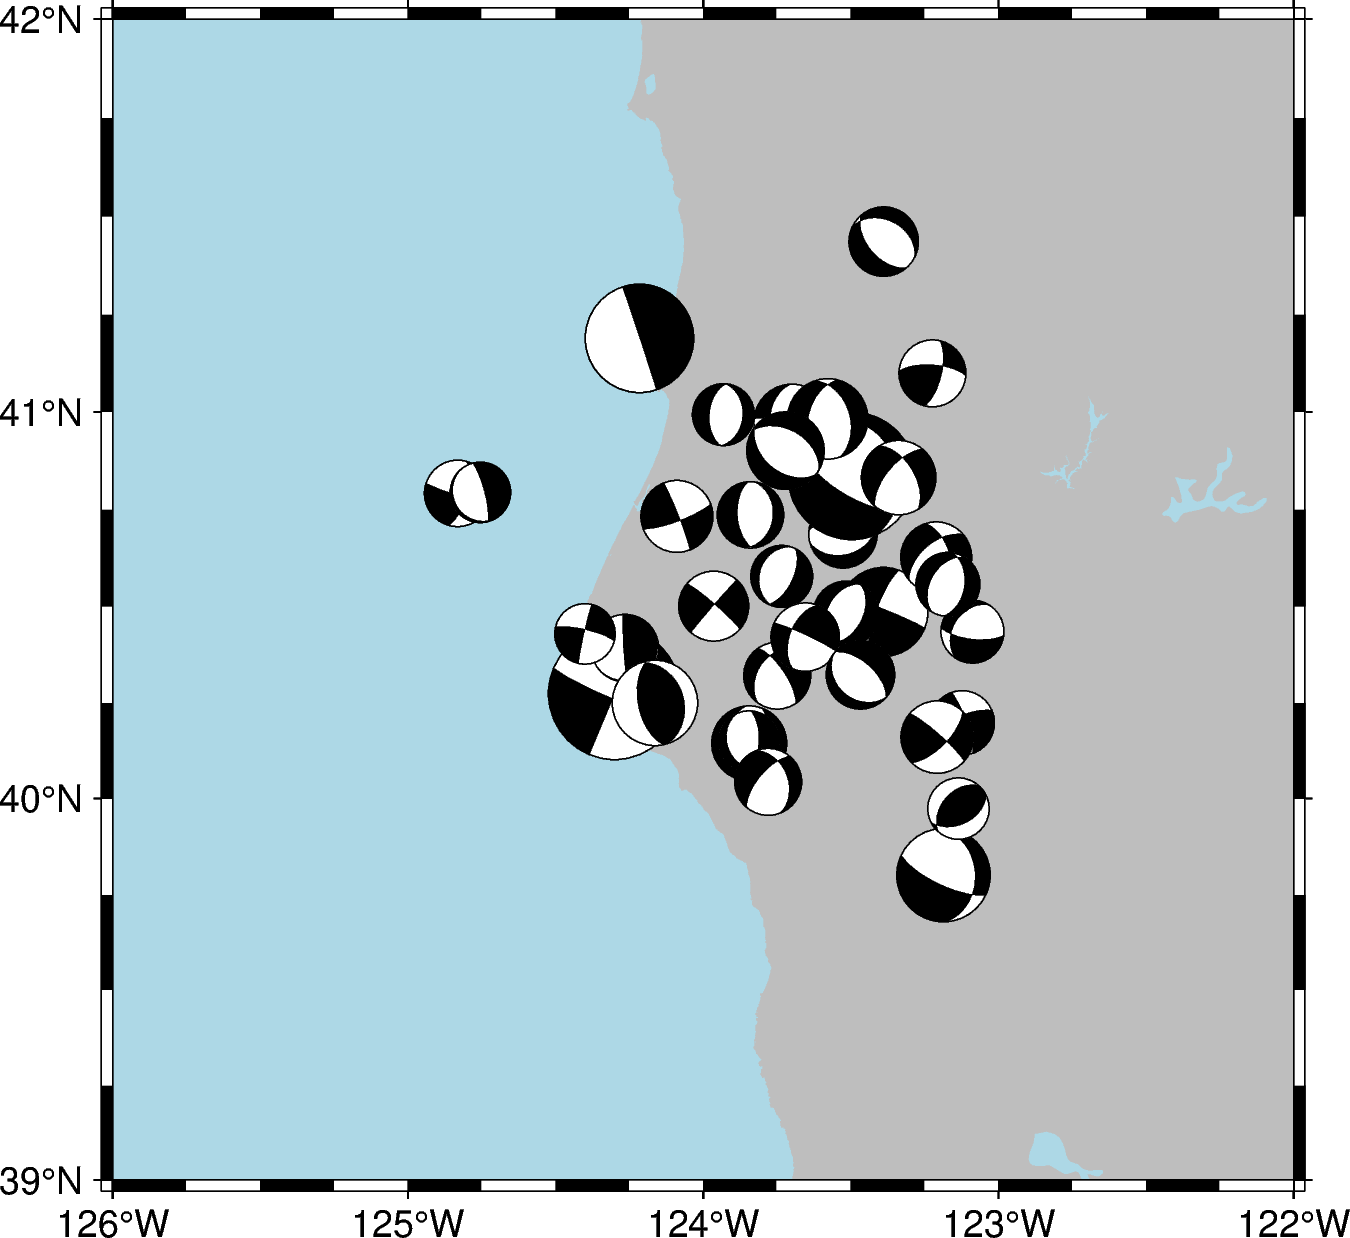

In [2]:
import pygmt
eq_df = pd.read_csv('../data/eq_data/1_eq_catalogs/usgs_eq_above_slab2_all.csv')

fig = pygmt.Figure()

# Plot the coastlines
fig.coast(
    region=[-126, -122, 39, 42],
    projection='M10c',
    land='grey',
    water='lightblue',
    frame=True,
)
for i, row in df.iterrows():
    lon = eq_df.loc[eq_df.id == row.event_id, 'longitude'].values[0]
    lat = eq_df.loc[eq_df.id == row.event_id, 'latitude'].values[0]
    fm_dict = dict(
        strike=row.strike,
        dip=row.dip,
        rake=row.rake,
        magnitude=eq_df.loc[eq_df.id == row.event_id, 'mag'].values[0],
    )
    # print(fm_dict)

    fig.meca(
        fm_dict,
        scale='1c',
        longitude=lon,
        latitude=lat,
    )
    # fig.text(
    #     x=lon,
    #     y=lat,
    #     text=f"{row.quality}",
    #     # font='12p,Helvetica-Bold,black',
    #     # justify='BL',
    # )
fig.show()

,event_id,strike,dip,rake,quality,fault_plane_uncertainty,aux_plane_uncertainty,num_p_pol,num_sp_ratios,polarity_misfit,prob_mech,sta_distribution_ratio,sp_misfit,mult_solution_flag
0,nc51207829,129.6133,77.6335,-168.4329,A,24.6336,22.6547,32,0,3.4,85.1,82.4,0.0,False
1,nc73201181,112.5341,83.2584,-179.8331,A,16.4481,18.1059,63,0,11.9,97.7,68.3,0.0,False
2,nc51207076,128.2020,0.8573,-123.6137,A,24.9018,24.2419,36,0,10.3,89.6,70.7,0.0,False
3,nc40221138,311.0789,84.7093,-178.2574,A,24.0745,23.2316,46,0,6.3,89.6,58.7,0.0,False
4,nc73139526,338.6172,85.9462,169.1236,A,16.8012,25.4146,28,0,7.4,91.6,76.0,0.0,False


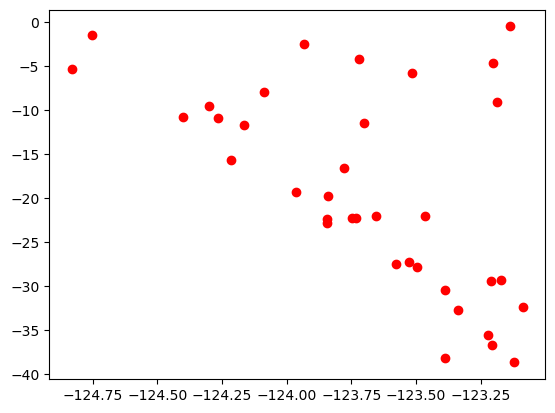

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i, row in df.iterrows():
    lon = eq_df.loc[eq_df.id == row.event_id, 'longitude'].values[0]
    dep = eq_df.loc[eq_df.id == row.event_id, 'depth'].values[0]
    ax.plot(lon, -dep, 'o', color='r')
plt.show()

## READ NCEDC focal mechanism solutions:

In [38]:
import os
import numpy as np
import pandas as pd

ncedc_fm_file = '../data/NCEDC_FM_solutions/NCEDC_FM.txt'
ncedc_fm_df = pd.DataFrame()

with open (ncedc_fm_file, 'r') as f:
    lines = f.readlines()
    lines = lines[13:]        # skip the header

    for i, line in enumerate(lines):

        # Determine the sign of the latitude and longitude
        n = -1 if line[19] == 'S' else 1
        e = 1 if line[32] == 'E' else -1
        
        # Extract the data into a dictionary
        data = {
            'event_id': line[131:141].strip(),
            'time': f'{line[0:4]}:{line[4:6]}:{line[6:8]}T{line[9:11]}:{line[11:13]}:{line[14:19]}',
            'latitude': (float(line[19:22]) + float(line[23:25])/60) * n,
            'longitude': (float(line[28:32]) + float(line[33:35])/60) * e,
            'depth': float(line[38:45].strip()),
            'mag': float(line[47:52]),
            'max_agap': float(line[55:59]),
            'dip_azimuth': float(line[83:86]),
            'strike': float(line[83:86]) + 90 if float(line[83:86]) < 180 else float(line[83:86]) - 90,
            'dip': float(line[87:89]),
            'rake': float(line[89:93]),
            'misfit': float(line[95:99]),
            'n_fmo': int(line[100:103]), # Number of first motion observations used in solution
            'misfit_w_90ci': line[104:109].strip(),
            'max_strike_90ci': line[121:123].strip(),
            'max_dip_90ci': line[124:126].strip(),
            'max_rake_90ci': line[127:129].strip(),
            'multi_sol_flag': 1 if line[130] == '*' else 0,
        }
        temp_df = pd.DataFrame(data, index=[0])
        
        # Concatenate the dataframes into a single dataframe
        if i == 0:
            ncedc_fm_df = temp_df
        else:
            ncedc_fm_df = pd.concat([ncedc_fm_df, temp_df], ignore_index=True)

ncedc_fm_df.to_csv('../data/NCEDC_FM_solutions/NCEDC_FM.csv', index=False)
ncedc_fm_df

,event_id,time,latitude,longitude,depth,mag,max_agap,dip_azimuth,strike,dip,rake,misfit,n_fmo,misfit_w_90ci,max_strike_90ci,max_dip_90ci,max_rake_90ci,multi_sol_flag
0,51196619,2008:02:18T00:23:43.22,40.516667,-124.183333,18.36,2.26,133.0,330.0,240.0,85.0,-10.0,0.08,26,,8,23,25,0
1,51196619,2008:02:18T00:23:43.22,40.516667,-124.183333,18.36,2.26,133.0,200.0,110.0,50.0,90.0,0.07,26,,8,3,25,1
2,51196707,2008:02:19T13:02:28.69,39.850000,-123.500000,5.59,2.45,103.0,70.0,160.0,45.0,-140.0,0.04,30,,20,28,35,0
3,51196707,2008:02:19T13:02:28.69,39.850000,-123.500000,5.59,2.45,103.0,265.0,175.0,50.0,-110.0,0.11,30,,13,18,20,1
4,51197782,2008:03:07T16:44:17.60,39.866667,-123.183333,9.19,2.29,66.0,120.0,210.0,85.0,0.0,0.04,29,,8,35,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,73976956,2023:12:16T08:45: 1.53,40.433333,-124.716667,24.11,2.62,225.0,60.0,150.0,90.0,90.0,0.12,42,,20,25,60,0
1840,73976956,2023:12:16T08:45: 1.53,40.433333,-124.716667,24.11,2.62,225.0,235.0,145.0,80.0,-110.0,0.15,42,,25,40,40,1
1841,73980066,2023:12:23T22:11:10.53,40.550000,-124.200000,15.95,2.12,67.0,70.0,160.0,65.0,-120.0,0.07,30,,15,23,25,0
1842,73980066,2023:12:23T22:11:10.53,40.550000,-124.200000,15.95,2.12,67.0,105.0,195.0,50.0,-60.0,0.10,30,,8,15,10,1
